## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Importar las bibliotecas necesarias 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
#Cargar los datos 
car_data = pd.read_csv('car data.csv') 
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [24]:
#Inspeccionar los datos 
print("Primeras filas de 'car data':") 
print(car_data) 
print("\nPrimeras filas de 'CAR DETAILS FROM CAR DEKHO':") 
print(car_dekho) 

Primeras filas de 'car data':
    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1    

In [26]:
#Verificar los nombres de las columas 
print("\nNombres de las columnas en 'car data':") 
print(car_data.columns.tolist()) 
print("\nNombres de las columnas en 'CAR DETAILS FROM CAR DEKHO':") 
print(car_dekho.columns.tolist()) 


Nombres de las columnas en 'car data':
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

Nombres de las columnas en 'CAR DETAILS FROM CAR DEKHO':
['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


In [30]:
#Limpiar espacios en los nombres de las columnas 
car_data.columns = car_data.columns.str.strip() 
car_dekho.columns = car_dekho.columns.str.strip() 

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [52]:
#Leer todos los datos de los archivos 
car_data = pd.read_csv('car data.csv')
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv') 

In [66]:
#Limpiar 'car_data' 
#Convertir Selling Frice y Present Price a tipo numérico 
car_data['Selling_Price'] = pd.to_numeric(car_data['Selling_Price'], errors='coerce')
car_data['Present_Price'] = pd.to_numeric(car_data['Present_Price'], errors='coerce')

In [70]:
#Asegurarse de que Kms Driven sea tratado correctamente 
car_data['Kms_Driven'] = car_data['Kms_Driven'].astype(str).str.replace('km', '').str.replace(',', '').astype(float) 

In [76]:
#Manejo de valores faltantes en car_data solo para columnas numéricas  
numeric_cols_car_data = car_data.select_dtypes (include=['float64', 'Int64']).columns 
car_data[numeric_cols_car_data] = car_data[numeric_cols_car_data].fillna (car_data [numeric_cols_car_data].mean())

In [82]:
#Limpiar 'car_dekho'
#Convertir Selling Frice y Kilómetros a tipo numérico 
car_dekho['selling_price'] = pd.to_numeric(car_dekho['selling_price'], errors='coerce') 
car_dekho['km_driven'] = pd.to_numeric(car_dekho['km_driven'], errors='coerce')

In [84]:
#Manejo de valores faltantes en car_dekho solo para columnas numéricas 
numeric_cols_car_dekho = car_dekho.select_dtypes (include=['float64', 'Int64']).columns 
car_dekho[numeric_cols_car_dekho] = car_dekho[numeric_cols_car_dekho].fillna (car_dekho [numeric_cols_car_dekho].mean())

In [96]:
#Convertir columnas categóricas a tipo de categoría (opcional) 
categorical_columns_car_data = ['Fuel_Type', 'Seller_Type', 'Transmission'] 
categorical_columns_car_dekho = ['fuel', 'seller_type', 'transmission', 'owner'] 

for col in categorical_columns_car_data:
    car_data[col] = car_data[col].astype('category') 

for col in categorical_columns_car_dekho:
    car_dekho[col] = car_dekho[col].astype('category') 

In [110]:
#Mostrar las primeras 5 Filas, 5 puntos suspensivos y las últinas 5 filas
print("Datos preprocesados de car_data: ") 
print(pd.concat([car_data.head(), pd.DataFrame([["..."] * len(car_data.columns)], columns=car_data.columns), car_data.tail()])) 
print("\nDatos preprocesados de CAR DETAILS FROM CAR DEKHO:") 
print(pd.concat([car_dekho.head(), pd.DataFrame([["..."] * len(car_dekho.columns)], columns=car_dekho.columns), car_dekho.tail()]))

Datos preprocesados de car_data: 
    Car_Name  Year Selling_Price Present_Price Kms_Driven Fuel_Type  \
0       ritz  2014          3.35          5.59    27000.0    Petrol   
1        sx4  2013          4.75          9.54    43000.0    Diesel   
2       ciaz  2017          7.25          9.85     6900.0    Petrol   
3    wagon r  2011          2.85          4.15     5200.0    Petrol   
4      swift  2014           4.6          6.87    42450.0    Diesel   
0        ...   ...           ...           ...        ...       ...   
296     city  2016           9.5          11.6    33988.0    Diesel   
297     brio  2015           4.0           5.9    60000.0    Petrol   
298     city  2009          3.35          11.0    87934.0    Petrol   
299     city  2017          11.5          12.5     9000.0    Diesel   
300     brio  2016           5.3           5.9     5464.0    Petrol   

    Seller_Type Transmission Owner  
0        Dealer       Manual     0  
1        Dealer       Manual     0  
2 


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


In [140]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt 
import seaborn as sns

In [144]:
#Leer todos los datos de los archivos 
car_data = pd.read_csv('car data.csv')
car_dekho = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv') 

In [146]:
#Limpiar 'car_data' 
car_data['Selling_Price'] = pd.to_numeric(car_data['Selling_Price'], errors='coerce')
car_data['Present_Price'] = pd.to_numeric(car_data['Present_Price'], errors='coerce')

car_data['Kms_Driven'] = car_data['Kms_Driven'].astype(str).str.replace('km', '').str.replace(',', '').astype(float) 

numeric_cols_car_data = car_data.select_dtypes (include=['float64', 'Int64']).columns 
car_data[numeric_cols_car_data] = car_data[numeric_cols_car_data].fillna (car_data [numeric_cols_car_data].mean())

In [148]:
#Limpiar 'car_dekho' 
car_dekho['selling_price'] = pd.to_numeric(car_dekho['selling_price'], errors='coerce') 
car_dekho['km_driven'] = pd.to_numeric(car_dekho['km_driven'], errors='coerce')

numeric_cols_car_dekho = car_dekho.select_dtypes (include=['float64', 'Int64']).columns 
car_dekho[numeric_cols_car_dekho] = car_dekho[numeric_cols_car_dekho].fillna (car_dekho [numeric_cols_car_dekho].mean())

categorical_columns_car_data = ['Fuel_Type', 'Seller_Type', 'Transmission'] 
categorical_columns_car_dekho = ['fuel', 'seller_type', 'transmission', 'owner'] 

for col in categorical_columns_car_data:
    car_data[col] = car_data[col].astype('category') 

for col in categorical_columns_car_dekho:
    car_dekho[col] = car_dekho[col].astype('category') 

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [118]:
from sklearn.model_selection import train_test_split

In [152]:
#Definir la variable objetivo y las características 
X = car_data[['Present_Price', 'Year', 'Kms_Driven']] # Características relevantes 
Y = car_data['Selling_Price'] # Variable objetivo 

In [154]:
#Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [200]:
#Mostrar las dimensiones de los conjuntos resultantes 
print("Dimensiones del conjunto de entrenamiento:") 
print("X_train:", X_train.shape) 
print("Y_train:", Y_train.shape) 
print("\nDimensiones del conjunto de prueba:") 
print("X_test:", X_test.shape) 
print("Y_test:", Y_test.shape)

Dimensiones del conjunto de entrenamiento:
X_train: (240, 3)
Y_train: (240,)

Dimensiones del conjunto de prueba:
X_test: (61, 3)
Y_test: (61,)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [202]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [206]:
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=3)
model.fit(X_train, Y_train) 

RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=200)

In [189]:
# Obtener la importancia de las características 
importance = model.feature_importances_ 

In [204]:
# Evaluación del modelo 
Y_pred = model.predict(X_test) 
mse = mean_squared_error(Y_test, Y_pred) 
r2 = r2_score(Y_test, Y_pred) 

print(f'Mean Squared Error: {mse:.2f}') 
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.92
R^2 Score: 0.96


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [208]:
import numpy as np 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [216]:
#Realizar predicciones en el conjunto de prueba
Y_pred = model.predict(X_test) 

In [220]:
#Calcular las métricas 
mae = mean_absolute_error(Y_test, Y_pred) 
mse = mean_squared_error(Y_test, Y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(Y_test, Y_pred) 

In [224]:
#Mostrar las métricas 
print("Evaluación del Modelo en el Conjunto de Test:") 
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}") 
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}") 
print(f"R² Score: {r2:.2f}")

Evaluación del Modelo en el Conjunto de Test:
Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 1.01
Root Mean Squared Error (RMSE): 1.00
R² Score: 0.96


## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [234]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [238]:
#Predicciones en el conjunto de prueba 
y_pred = model.predict(X_test) 

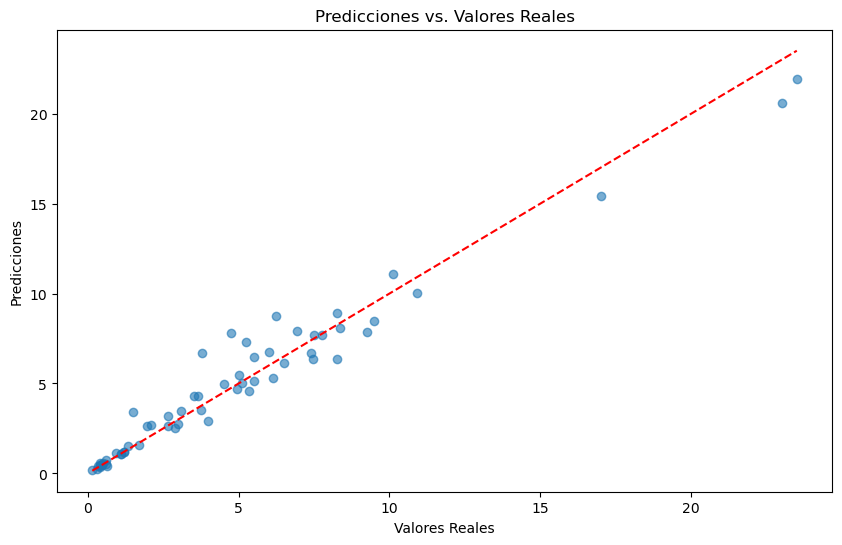

In [244]:
#1. Gráfica de Predicciones vs. Valores Reales 
plt.figure(figsize=(10, 6)) 
plt.scatter(Y_test, Y_pred, alpha=0.6) 
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.title('Predicciones vs. Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show() 

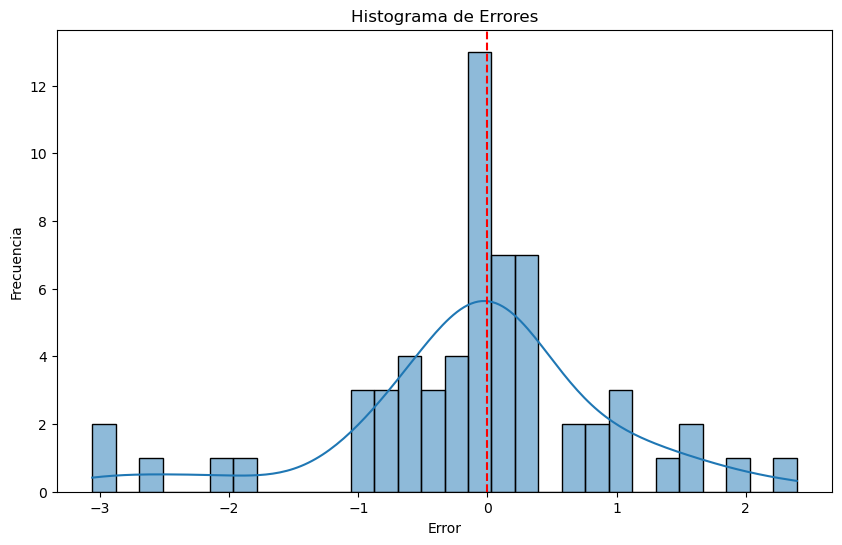

In [255]:
#2. Histograma de Errores 
errors = Y_test - Y_pred 
plt.figure(figsize=(10, 6)) 
sns.histplot(errors, bins=30, kde=True) 
plt.title('Histograma de Errores')
plt.xlabel('Error') 
plt.ylabel('Frecuencia') 
plt.axvline(0, color='red', linestyle='--') # Linea en x=0 
plt.show() 

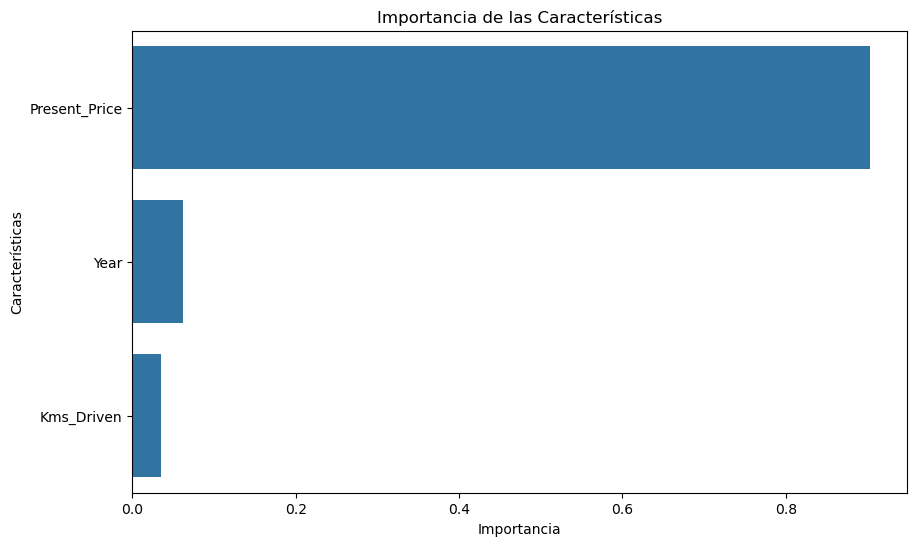

In [273]:
#3. Gráfica de Importancia de Características 
importance = model.feature_importances_ 
feature_importance = pd.DataFrame ({'Feature': X.columns, 'Importance': importance}) 
feature_importance = feature_importance.sort_values(by='Importance', ascending=False) 

plt.figure(figsize=(10, 6)) 
sns.barplot(x='Importance', y='Feature', data=feature_importance) 
plt.title('Importancia de las Características') 
plt.xlabel('Importancia') 
plt.ylabel('Características') 
plt.show()